In [1]:
from bs4 import BeautifulSoup
import requests
from PIL import Image
from PIL.ImageDraw import Draw
import sys
sys.path.append("../server/")
resp=requests.get('https://www.trianglemtb.com')
soup=BeautifulSoup(resp.text,'html.parser') 

In [2]:
def get_status_dict():
    resp = requests.get('https://www.trianglemtb.com')
    soup=BeautifulSoup(resp.text,'html.parser') 
    status_dict = {}
    a = soup.findAll("span")
    for item in a:
        if 'CLOSED' in item.text or 'OPEN' in item.text:
            test = item
            status_dict[test.parent.parent.parent.a.text] = True if 'OPEN' in item.text else False
    return status_dict

In [3]:
status = get_status_dict()

In [4]:
def image(status):
    

    from calendar import Calendar
    from calendar import monthrange
    from calendar import SUNDAY
    from collections import Counter
    from datetime import datetime
    from datetime import timedelta
    from dateutil.parser import parse
    from googleapiclient import discovery
    from googleapiclient.http import build_http
    from logging import warning
    from logging import error
    from oauth2client.client import HttpAccessTokenRefreshError
    from PIL import Image
    from PIL.ImageDraw import Draw

    from epd import DISPLAY_WIDTH
    from epd import DISPLAY_HEIGHT
    from firestore import DataError
    from firestore import GoogleCalendarStorage
    from graphics import draw_text
    from graphics import SUBVARIO_CONDENSED_MEDIUM
    from graphics import SCREENSTAR_LARGE_REGULAR
    from content import ContentError
    from content import ImageContent
    from local_time import LocalTime
    """Generates an image with MTB status"""

    # The width of the display in pixels.
    DISPLAY_WIDTH = 640

    # The height of the display in pixels.
    DISPLAY_HEIGHT = 384

    # The color of the image background.
    BACKGROUND_COLOR = (255, 255, 255)

    # The color used for days.
    NUMBER_COLOR = (0, 0, 0)

    # The color used for the current day and events.
    TODAY_COLOR = (255, 255, 255)

    # The squircle image file.
    SQUIRCLE_FILE = 'assets/squircle.gif'

    # The dot image file.
    DOT_FILE = 'assets/dot.gif'

    # The offset used to vertically center the numbers in the squircle.
    NUMBER_Y_OFFSET = 0

    # The horizontal margin between dots.
    DOT_MARGIN = 4

    # The vertical offset between dots and numbers.
    DOT_OFFSET = 16

    # The color used to highlight the current day and events.
    HIGHLIGHT_COLOR = (255, 0, 0)

    TEXT_COLOR = (0, 0, 0)

    trail_num = len(status.keys())

    # Create a blank image.
    image = Image.new(mode='RGB', size=(DISPLAY_WIDTH, DISPLAY_HEIGHT),
                      color=BACKGROUND_COLOR)
    draw = Draw(image)

    # Determine the spacing of the days in the image.
    y_stride = DISPLAY_HEIGHT // (trail_num + 1)

    
    draw_text('Mountain Bike', SCREENSTAR_LARGE_REGULAR, TEXT_COLOR,
                  xy=(200, (DISPLAY_HEIGHT / 2)-20) ,image=image)
    draw_text('Trail Status', SCREENSTAR_LARGE_REGULAR, TEXT_COLOR,
                  xy=(200, (DISPLAY_HEIGHT / 2)) ,image=image)
    
    # Draw each week in a row.
    trails = list(status.keys())
    for trail_index in range(trail_num):
        
        if not status[trails[trail_index]]:
            bg_color = HIGHLIGHT_COLOR
            color = HIGHLIGHT_COLOR
        else:
            color = TEXT_COLOR
            bg_color = None
            
        y = (trail_index + 1) * y_stride
        draw_text(str(trails[trail_index]), SUBVARIO_CONDENSED_MEDIUM, TEXT_COLOR,
                  xy=(400, y - NUMBER_Y_OFFSET), image=image, box_color = bg_color)
        
        dot = Image.open(DOT_FILE).convert(mode='RGBA')
        dot = dot.resize((15,15))
        dot_xy = [600,y- dot.width // 2]
        draw.bitmap(dot_xy, dot, color)
        
    return image

In [5]:
im = image(status)

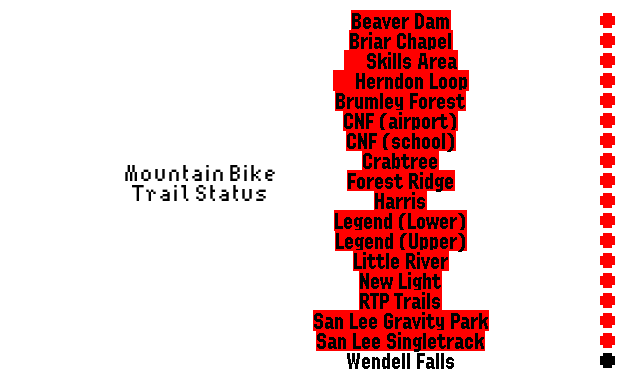

In [6]:
im